<a href="https://colab.research.google.com/github/PProsper/3600ID_ML/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original work statement:
Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

Your name: Jesenia Fuentes,Patrice Prosper,Ognila Biswas 

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics 
%matplotlib inline
from sklearn import linear_model
from numpy import linalg as la
from sklearn.preprocessing import PolynomialFeatures

In [10]:
from google.colab import files

In [11]:
props = pd.read_csv('GalaxyProperties.csv', sep = ',')
spectra = pd.read_csv('spectra.csv', sep = ',')
specs = pd.read_excel('spectra.xlsx')
wave = pd.read_csv('wavelengths.csv', sep = ',', header= None)

In [12]:
props.shape

(1000, 5)

In [13]:
props.head(1)

,Unnamed: 0,dust_av,age,mass,tauGyr
0,0,0.164869,0.203291,7.885367,0.033035


In [14]:
spectra.shape

(1000, 1)

In [15]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   head    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [16]:
specs.shape

(1000, 850)

In [17]:
specs.loc[0:1].values

array([[0.010532 , 0.0118543, 0.0114774, ..., 0.0235315, 0.0235232,
        0.0235604],
       [0.0122055, 0.0134793, 0.0133496, ..., 0.0439096, 0.0435937,
        0.0437942]])

In [18]:
wave.shape

(850, 1)

In [19]:
wave.values[0:5]

array([[ 995.952],
       [2005.169],
       [2014.43 ],
       [2023.732],
       [2033.078]])

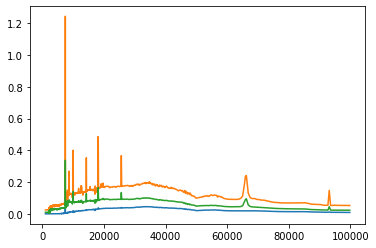

In [20]:
plt.figure()
x = wave.values
y = specs.loc[500,:].values
plt.plot(x, y)
y2 = specs.loc[998,:].values
plt.plot(x, y2)
y3 = specs.loc[0,:].values
plt.plot(x, y3)

In [21]:
dust_avs = props['dust_av']
display(dust_avs)

0      0.164869
1      0.200852
2      0.197863
3      0.001000
4      0.001000
         ...   
995    0.322905
996    0.870794
997    0.001000
998    0.232163
999    0.456984
Name: dust_av, Length: 1000, dtype: float64

In [22]:
df_dust = pd.concat([dust_avs,specs], axis=1, sort =False) 
#used specs which is the excel comma seperated version of the spectra csv
#the cross val function was considering each row of the single column in the spectra csv as a string rather than 850 seperate floats

In [23]:
df_dust.head(1)

,dust_av,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,...,Column811,Column812,Column813,Column814,Column815,Column816,Column817,Column818,Column819,Column820,Column821,Column822,Column823,Column824,Column825,Column826,Column827,Column828,Column829,Column830,Column831,Column832,Column833,Column834,Column835,Column836,Column837,Column838,Column839,Column840,Column841,Column842,Column843,Column844,Column845,Column846,Column847,Column848,Column849,Column850
0,0.164869,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,0.014847,0.015355,0.014811,0.016711,0.01475,0.015961,0.015273,0.017341,0.010833,0.015473,0.018079,0.015602,0.017929,0.014516,0.01694,0.019523,0.016641,0.01594,0.021192,0.016716,0.019832,0.020512,0.01835,0.019752,0.017349,0.017545,0.017032,0.018222,0.016267,...,0.031589,0.031717,0.031447,0.031581,0.031534,0.031419,0.030583,0.029491,0.029499,0.028562,0.02784,0.027534,0.026948,0.026983,0.026767,0.026105,0.026277,0.026052,0.025344,0.025126,0.024816,0.024368,0.024672,0.024484,0.045736,0.024255,0.024077,0.024201,0.024306,0.024166,0.024035,0.02381,0.024046,0.023865,0.023751,0.02378,0.0237,0.023532,0.023523,0.02356


In [24]:
df_dust.index.name = 'gal_id'
df_dust.index.name 

'gal_id'

In [25]:
df_dust.columns

Index(['dust_av', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9',
       ...
       'Column841', 'Column842', 'Column843', 'Column844', 'Column845',
       'Column846', 'Column847', 'Column848', 'Column849', 'Column850'],
      dtype='object', length=851)

In [26]:
LearningSet = df_dust

In [27]:
LearningSet.head(1)

,dust_av,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,...,Column811,Column812,Column813,Column814,Column815,Column816,Column817,Column818,Column819,Column820,Column821,Column822,Column823,Column824,Column825,Column826,Column827,Column828,Column829,Column830,Column831,Column832,Column833,Column834,Column835,Column836,Column837,Column838,Column839,Column840,Column841,Column842,Column843,Column844,Column845,Column846,Column847,Column848,Column849,Column850
gal_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.164869,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,0.014847,0.015355,0.014811,0.016711,0.01475,0.015961,0.015273,0.017341,0.010833,0.015473,0.018079,0.015602,0.017929,0.014516,0.01694,0.019523,0.016641,0.01594,0.021192,0.016716,0.019832,0.020512,0.01835,0.019752,0.017349,0.017545,0.017032,0.018222,0.016267,...,0.031589,0.031717,0.031447,0.031581,0.031534,0.031419,0.030583,0.029491,0.029499,0.028562,0.02784,0.027534,0.026948,0.026983,0.026767,0.026105,0.026277,0.026052,0.025344,0.025126,0.024816,0.024368,0.024672,0.024484,0.045736,0.024255,0.024077,0.024201,0.024306,0.024166,0.024035,0.02381,0.024046,0.023865,0.023751,0.02378,0.0237,0.023532,0.023523,0.02356


In [28]:
#LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold,cross_val_score, cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler as sc , RobustScaler as rb

In [30]:
X = df_dust.iloc[:,1:]
Y = df_dust.iloc[:, :1] 
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=4)
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size=0.2, random_state=5) 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,test_size=0.2) 
# Xtrain = sc.fit_transform(X= Xtrain)
# Xtest = sc.transform(X= Xtest)

In [31]:
predictions = []

In [32]:
model = KNeighborsRegressor(n_neighbors=5)

In [33]:
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [34]:
Xtrain.shape

(800, 850)

In [35]:
print(Xtrain.iloc[:5,0:])

         Column1   Column2   Column3  ...  Column848  Column849  Column850
gal_id                                ...                                 
291     0.048876  0.054152  0.053403  ...   0.049530   0.049605   0.049686
858     0.467607  0.515790  0.515666  ...   2.045460   2.065410   2.091740
888     0.039335  0.042977  0.042930  ...   0.015381   0.015461   0.015494
163     0.332548  0.363772  0.362521  ...   0.156016   0.156296   0.156404
742     0.000003  0.000003  0.000003  ...   0.008597   0.008397   0.008427

[5 rows x 850 columns]


In [36]:
Ytrain.shape

(800, 1)

In [37]:
print(Ytrain.iloc[:5,:1])

         dust_av
gal_id          
291     0.120154
858     0.552416
888     0.074435
163     0.063155
742     0.001000


In [38]:
scores = cross_val_score(model, X = Xtrain, y = Ytrain, cv=5)
#could not use Xtrain and Ytrain as parameters, had to use the cross_val_score built in param names X and y
#removed the scoring parameter so that it defaluted to R2, unable to use accuracy as a scoring method as discused in class

In [39]:
cross_val_score?

In [40]:
scores
#scores at random_state = 4 are array([0.66491124, 0.59952558, 0.74219485, 0.66313659, 0.52453145])
#scores at test_size= 0.2 and random_state = 5 are array([0.64348629, 0.76861964, 0.64540519, 0.64817706, 0.78061009])

array([0.61148116, 0.75448118, 0.66344534, 0.73316547, 0.68634069])

In [41]:

model.fit(Xtrain,Ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [42]:
ypred_dust = model.predict(Xtest)
predictions.append(ypred_dust)

In [43]:
ypred_dust.shape

(200, 1)

In [44]:
r2(Ytest, ypred_dust)

0.7380942883128163

(0.0, 1.0)

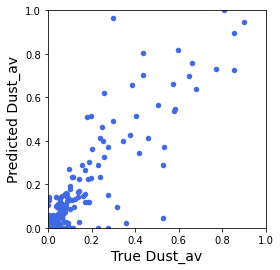

In [46]:
plt.scatter(ypred_dust,Ytest, s = 20, c = 'royalblue')
plt.xlabel('True Dust_av' , fontsize=14)
plt.ylabel('Predicted Dust_av',fontsize=14)
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
# sklearn.metrics.accuracy_score(Ytest,ypred)
#can not test for accuracy between testa and predictions since the target is not binary 

In [ ]:
distances = model.kneighbors(Xtest, return_distance=True)[0][:5]
distances.shape

In [ ]:
print(distances)

In [ ]:
#rescaling using robust scaler 

In [ ]:
rb(Xtrain)

In [ ]:
robtrain = rb.transform(Xtrain)

In [ ]:
predictions = []
predictions.append(ypred_dust,ypred_masss,ypred_age, ypred_tau)
from itertools import permutations as perm
perm(predictions)

def scafold(perm):
  for i in perm:
    for j in i:
      df1.concate(j[1:1], spectra)
      x1 = df1.iloc[:,1:]
      y1 = df1.iloc[:,:1]
      df2.concate(j[1:2], spectra)
      x2 = df2.iloc[:,1:]
      y2 = df2.iloc[:,:1]
      df3.concate(j[1:3], spectra)
      x3 = df3.iloc[:,1:]
      y3 = df3.iloc[:,:1]
      ys = [].append(y*)
      xs = [].append(y*)
      return xs, ys

def scores(xs, ys):
  for i in xs:
    for j in ys:
      Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs[i], ys[i],test_size=0.2) 
      scores = cross_val_score(model, X = Xtrain, y = Ytrain, cv=5)
      return scores